# Preparation

In [2]:
# Import primary functions
import os
import sklearn
import lightgbm as lgb
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import secondary functions
from sklearn.preprocessing import LabelEncoder

# Show file directory location
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/test.csv.zip


In [3]:
# Import datasets
train = pd.read_csv('/kaggle/input/sf-crime/train.csv.zip', parse_dates= ['Dates'])
test = pd.read_csv('/kaggle/input/sf-crime/test.csv.zip', parse_dates= ['Dates'], index_col = 'Id')

In [4]:
# Show first five rows of the train dataset
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
# Show first five rows of the test dataset
test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


# Merge dataset

In [6]:
x = list(test)
t_data = train[x]
join = pd.concat([t_data, test])
merge = join.copy()

In [7]:
merge.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


In [8]:
t = train['Category']
merge.isnull().sum()

Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [9]:
LB = LabelEncoder()
tar = LB.fit_transform(t)
print(LB.classes_)

['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING'
 'FRAUD' 'GAMBLING' 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING'
 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER OFFENSES'
 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION' 'RECOVERED VEHICLE' 'ROBBERY'
 'RUNAWAY' 'SECONDARY CODES' 'SEX OFFENSES FORCIBLE'
 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY' 'SUICIDE' 'SUSPICIOUS OCC'
 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']


In [10]:
date = pd.to_datetime(join['Dates'])
merge['Date'] = date.dt.date
merge['Year'] = date.dt.year
merge['Month'] = date.dt.month
merge['Day'] = date.dt.day
merge['Hour'] = date.dt.hour
merge.drop('Dates', axis=1, inplace=True)

In [11]:
date = merge.groupby('Date').count().iloc[:, 0]

# Data visualization

Text(389.0, 0.005, 'Median389.0')

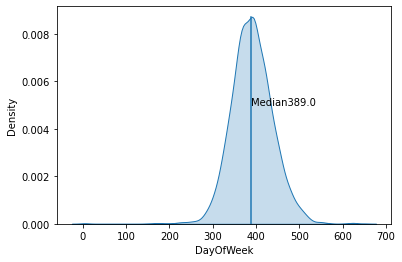

In [12]:
# Generate line chart
sns.kdeplot(data=date, shade=True)
plt.axvline(x=date.median(), ymax=0.95, linestyle='-')
plt.annotate('Median' + str(date.median()), xy=(date.median(), 0.005))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PdDis', ylabel='count'>

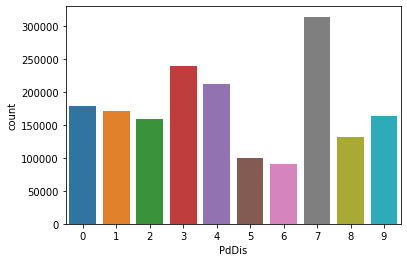

In [13]:
# Generate histogram
lb = LabelEncoder()
merge['PdDis'] = lb.fit_transform(merge['PdDistrict'])
sns.countplot(merge['PdDis'])

In [14]:
# Show first ten rows of the merged dataset
merge[['PdDistrict', 'PdDis']].head(10)

,PdDistrict,PdDis
0,NORTHERN,4
1,NORTHERN,4
2,NORTHERN,4
3,NORTHERN,4
4,PARK,5
5,INGLESIDE,2
6,INGLESIDE,2
7,BAYVIEW,0
8,RICHMOND,6
9,CENTRAL,1


# Data formatting

In [15]:
merge.drop('PdDistrict', axis=1, inplace=True)

In [16]:
merge['DayWeek'] = lb.fit_transform(merge['DayOfWeek'])
merge[['DayOfWeek', 'DayWeek']].head(10)

,DayOfWeek,DayWeek
0,Wednesday,6
1,Wednesday,6
2,Wednesday,6
3,Wednesday,6
4,Wednesday,6
5,Wednesday,6
6,Wednesday,6
7,Wednesday,6
8,Wednesday,6
9,Wednesday,6


In [17]:
merge.drop('DayOfWeek', axis=1, inplace=True)

In [18]:
merge['Block'] = merge['Address'].str.contains('block', case=False)
merge['ST'] = merge['Address'].str.contains('ST', case=False)
merge.drop('Address', axis=1, inplace=True)

In [19]:
print(merge['X'].min(), merge['X'].max())
print(merge['Y'].min(), merge['Y'].max())

-122.51364206429 -120.5
37.7078790224135 90.0


In [20]:
medX = merge[merge['X'] < -120.5]['X'].median()
medY = merge[merge['Y'] < 90]['Y'].median()
merge.loc[merge['X'] >= -120.5, 'X'] = medX
merge.loc[merge['Y'] >= 90, 'Y'] = medY

In [21]:
merge['X+Y'] = merge['X'] + merge['Y']
merge['X-Y'] = merge['X'] - merge['Y']

In [22]:
merge.drop('Date', axis=1, inplace=True)

In [23]:
data_train = merge[:train.shape[0]]
data_test = merge[train.shape[0]:]

# LightGBM training

In [24]:
trains = lgb.Dataset(data_train, label=tar, categorical_feature=['PdDis', 'DayWeek'])
params = {
    'boosting': 'gbdt',
    'objective': 'multiclass',
    'num_class': 39,
    'max_delta_step': 0.9,
    'min_data_in_leaf': 20,
    'learning_rate': 0.4,
    'max_bin': 480,
    'num_leaves': 45,
    'verbose': 1
}
bst = lgb.train(params, trains, 120)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2026
[LightGBM] [Info] Number of data points in the train set: 878049, number of used features: 12
[LightGBM] [Info] Start training from score -6.363608
[LightGBM] [Info] Start training from score -2.435509
[LightGBM] [Info] Start training from score -7.679105
[LightGBM] [Info] Start training from score -8.019031
[LightGBM] [Info] Start training from score -3.173428
[LightGBM] [Info] Start training from score -5.314447
[LightGBM] [Info] Start training from score -5.958804
[LightGBM] [Info] Start training from score -2.789256
[LightGBM] [Info] Start training from score -5.323749
[LightGBM] [Info] Start training from score -6.624123
[LightGBM] [Info] Start training from score -8.140280
[LightGBM] [Info] Start training from score -7.48

# Generate prediction

In [25]:
prediction = bst.predict(data_test)

In [26]:
prediction

array([[2.78373500e-03, 1.14468596e-01, 5.02283251e-09, ...,
        1.44306488e-01, 3.77371773e-02, 9.22733567e-02],
       [5.42634205e-04, 2.31854342e-02, 7.84042284e-11, ...,
        3.72089763e-02, 3.03760975e-02, 9.94005919e-03],
       [1.88103418e-03, 6.57855495e-02, 4.00947952e-07, ...,
        8.88604533e-02, 1.02515234e-02, 3.13892744e-03],
       ...,
       [6.16830191e-06, 6.06393536e-02, 3.67606653e-04, ...,
        3.70428459e-02, 9.64945355e-03, 3.91234321e-04],
       [2.36324179e-03, 8.45903020e-02, 2.81454364e-04, ...,
        2.49895555e-02, 9.34662777e-03, 4.77997768e-03],
       [2.62147406e-04, 6.27419038e-02, 1.47597347e-05, ...,
        2.15156863e-02, 1.27237228e-02, 1.17242168e-03]])

# Generate submission

In [30]:
result = pd.DataFrame(prediction, columns=LB.inverse_transform(np.linspace(0, 38, 39, dtype='int16')),index=data_test.index) 
result.to_csv('Submission_Jun-28-2024', index_label='Id')

In [31]:
result.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.002784,0.114469,5.022833e-09,4.694154e-07,0.009913,0.000142,0.011181,0.009161,0.000789,0.000095,...,1.866686e-09,0.003011,0.000476,0.060077,1.116501e-11,0.002859,0.121924,0.144306,0.037737,0.092273
1,0.000543,0.023185,7.840423e-11,1.025677e-07,0.000280,0.000128,0.028389,0.011689,0.000979,0.000003,...,3.507532e-09,0.001613,0.000046,0.013490,1.170090e-11,0.001210,0.011113,0.037209,0.030376,0.009940
2,0.001881,0.065786,4.009480e-07,9.799275e-08,0.202636,0.000089,0.000237,0.014322,0.001086,0.000015,...,1.041128e-08,0.004500,0.000006,0.022762,6.269101e-13,0.008922,0.049373,0.088860,0.010252,0.003139
3,0.003630,0.136331,6.565744e-08,1.075689e-05,0.041357,0.001583,0.000250,0.047199,0.003711,0.000003,...,5.239464e-10,0.012804,0.000002,0.040097,7.785436e-12,0.003444,0.057854,0.135475,0.046939,0.027344
4,0.003630,0.136331,6.565744e-08,1.075689e-05,0.041357,0.001583,0.000250,0.047199,0.003711,0.000003,...,5.239464e-10,0.012804,0.000002,0.040097,7.785436e-12,0.003444,0.057854,0.135475,0.046939,0.027344


In [32]:
print("Successfully saved as submission file")

Successfully saved as submission file
